# Tokamak GOLEM Tektronix MSO56 DAS Oscilloscope

## Prerequisites

In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt

URL = 'http://golem.fjfi.cvut.cz/shots/{}/DASs/TektrMSO56a/{}.csv'
shot_no = 31937

# function for reading 1D y(t) signals
def read_signal1d(shot_number, signal_id):
    url = URL.format(shot_number, signal_id)
    return pd.read_csv(url,names=['time',signal_id],
                         index_col='time')

## Raw data from oscilloscope

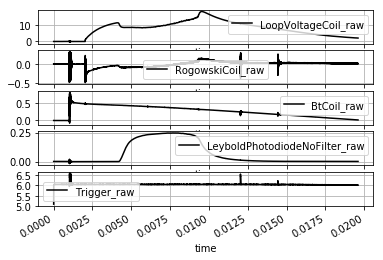

In [2]:
# read the specified signals
U_l = read_signal1d(shot_no, 'LoopVoltageCoil_raw')
dI_chp = read_signal1d(shot_no, 'RogowskiCoil_raw')
dB_t = read_signal1d(shot_no, 'BtCoil_raw')
I_all = read_signal1d(shot_no, 'LeyboldPhotodiodeNoFilter_raw')
Trigger = read_signal1d(shot_no, 'Trigger_raw')


# combine into a data frame table
df = pd.concat([U_l, dI_chp, dB_t, I_all,Trigger], axis='columns')

# plot the data table in subplots from 1 to 25 ms
df.loc[0e-3:25e-3].plot(subplots=True, ylim=(None,None))
plt.show()   # display the figure in a window

## Osciloscope data through math operation

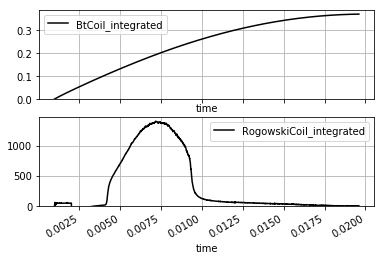

In [3]:
B_t = read_signal1d(shot_no, 'BtCoil_integrated')
I_chp = read_signal1d(shot_no, 'RogowskiCoil_integrated')

# combine into a data frame table
df = pd.concat([B_t,I_chp], axis='columns')

df.loc[1e-3:25e-3].plot(subplots=True, ylim=(0,None))
plt.show()   # display the figure in a window

## Classical presentation

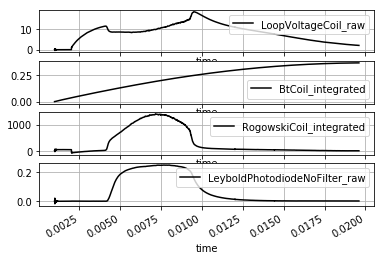

In [4]:
df = pd.concat([U_l, B_t, I_chp, I_all], axis='columns')

# plot the data table in subplots from 1 to 25 ms
df.loc[1e-3:25e-3].plot(subplots=True, ylim=(None,None))
plt.show()   # display the figure in a window